<a href="https://colab.research.google.com/github/NonKhuna/SuperAI_Engineer/blob/master/22p21c0495_%E0%B8%99%E0%B8%99%E0%B8%95%E0%B9%8C_DFS_on_graph_19_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Input Data

---


รับค่าจำนวนเต็ม n แทนจำนวน node และจำนวนเต็ม m แทน edge เป็น undirect <br>
m บรรทัด : คู่ node ที่เชื่อมกัน <br><br> หมายเหตุ : สามารถรันได้เลย มี test case ตัวอย่าง

In [ ]:
# default data
n = 11
m = 10
edges = [[0,1],[0,2],[0,6],[6,7],[1,3],[1,4],[0,5],[5,8],[5,9],[9,10]]


In [ ]:
###Options
#n = int(input("n = "))
#m = int(input("m = "))
#edges = []
#for i in range(m) :
#    x = [int(e) for e in input("").split()]
#    edges.append(x)

# Create Graph

---



In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

In [ ]:
G = nx.Graph()

#add Nodes
for i in range(n) :
  G.add_node(i,color = "red")

#creat edge :
for x,y in edges :
  G.add_edge(x,y)

#fix position
pos = nx.spring_layout(G)

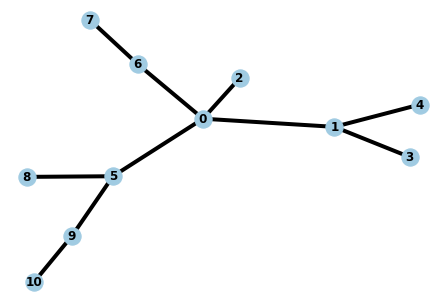

In [ ]:

options = {
    "node_color": "#A0CBE2",
    "edge_color": 'black',
    "width": 4,
    "edge_cmap": plt.cm.Blues,
    "with_labels": True,
    "font_weight": 'bold',
    "pos" : pos
}
nx.draw(G, **options)



# DFS Algo


---





In [ ]:

def depth_first_search(now,v,G,order) :
    v[now] = 1
    order.append(now)
    for u in G[now] :
      if v[u]==0 :
        depth_first_search(u,v,G,order)
    v[now] = 0

In [ ]:
visit = np.zeros(n)
orders = []

#start from node 0
depth_first_search(0,visit,G,orders)
print(orders)

[0, 1, 3, 4, 2, 6, 7, 5, 8, 9, 10]


# Generate Animation

---
หลัง generate gif จะปรากฏใน folder ฝั่งซ้าย <br>
ไฟล์ชื่อ **animation.gif**


In [ ]:
def paint_color(v) :
    colors = []
    for i in v :
      if i == 1 :
        colors.append('gray')
      else :
        colors.append('#A0CBE2')

    options = {
        "node_color": colors,
        "edge_color": 'black',
        "width": 4,
        "edge_cmap": plt.cm.Blues,
        "with_labels": True,
        "font_weight": 'bold',
        "pos" : pos
    }
    return options
  
def DrawImage(order) :
    visit = np.zeros(n)
    for i in range(n) :
      if i <= order :
         visit[orders[i]]=1 
    ax.clear()
    nx.draw(G, **paint_color(visit))

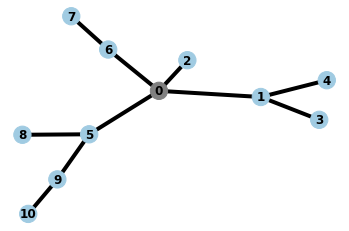

In [ ]:
# Build plot
fig, ax = plt.subplots(figsize=(6,4))
visit = np.zeros(n)
ani =FuncAnimation(fig, DrawImage , frames=len(orders), interval=10000, repeat=True)
ani.save('animation.gif', writer='pillow', fps=60)
#Image(url='animation.gif')
plt.show()